In [112]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

import IPython.display as ip

In [113]:
pathAudio = '/home/hp/Desktop/LA'
files = librosa.util.find_files(pathAudio, ext=['flac'])
files = np.asarray(files)

In [98]:
x, sr = librosa.load(files[0])

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(55134,) 22050


In [99]:
x0, sr = librosa.load(files[0])
x1, sr = librosa.load(files[1])
x2, sr = librosa.load(files[2])
x3, sr = librosa.load(files[3])
x4, sr = librosa.load(files[4])
x5, sr = librosa.load(files[5])
x6, sr = librosa.load(files[6])
x7, sr = librosa.load(files[7])
x8, sr = librosa.load(files[8])
x9, sr = librosa.load(files[9])
x10, sr = librosa.load(files[10])
x11, sr = librosa.load(files[11])
x12, sr = librosa.load(files[12])
x13, sr = librosa.load(files[13])

# Extacting short-time fourier transform

In [114]:
FRAME_SIZE = 1013
HOP_SIZE = 500
window_type = 'hann'

In [115]:
trade_off = librosa.stft(x0, n_fft = FRAME_SIZE, hop_length = HOP_SIZE, window = window_type)

In [116]:
trade_off.shape

(507, 111)

In [117]:
type(trade_off[0][0])

numpy.complex64

In [118]:
scale = np.abs(trade_off)**2

In [119]:
scale.shape

(507, 111)

In [120]:
type(scale[0][0])

numpy.float32

# Visualizing the spectrogram

In [127]:
def plot_spectrogram(Y,sr, hop_length, y_axis="linear"):
    plt.figure(figsize= (25,15))
    librosa.display.specshow(Y,
                            sr=sr,
                            hop_length=hop_length,
                            x_axis = "time",
                            y_axis=y_axis)
    plt.colorbar(format="%+2.f")
                        
                        
    

/tmp/ipykernel_58526/1364971162.py:3: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(Y,


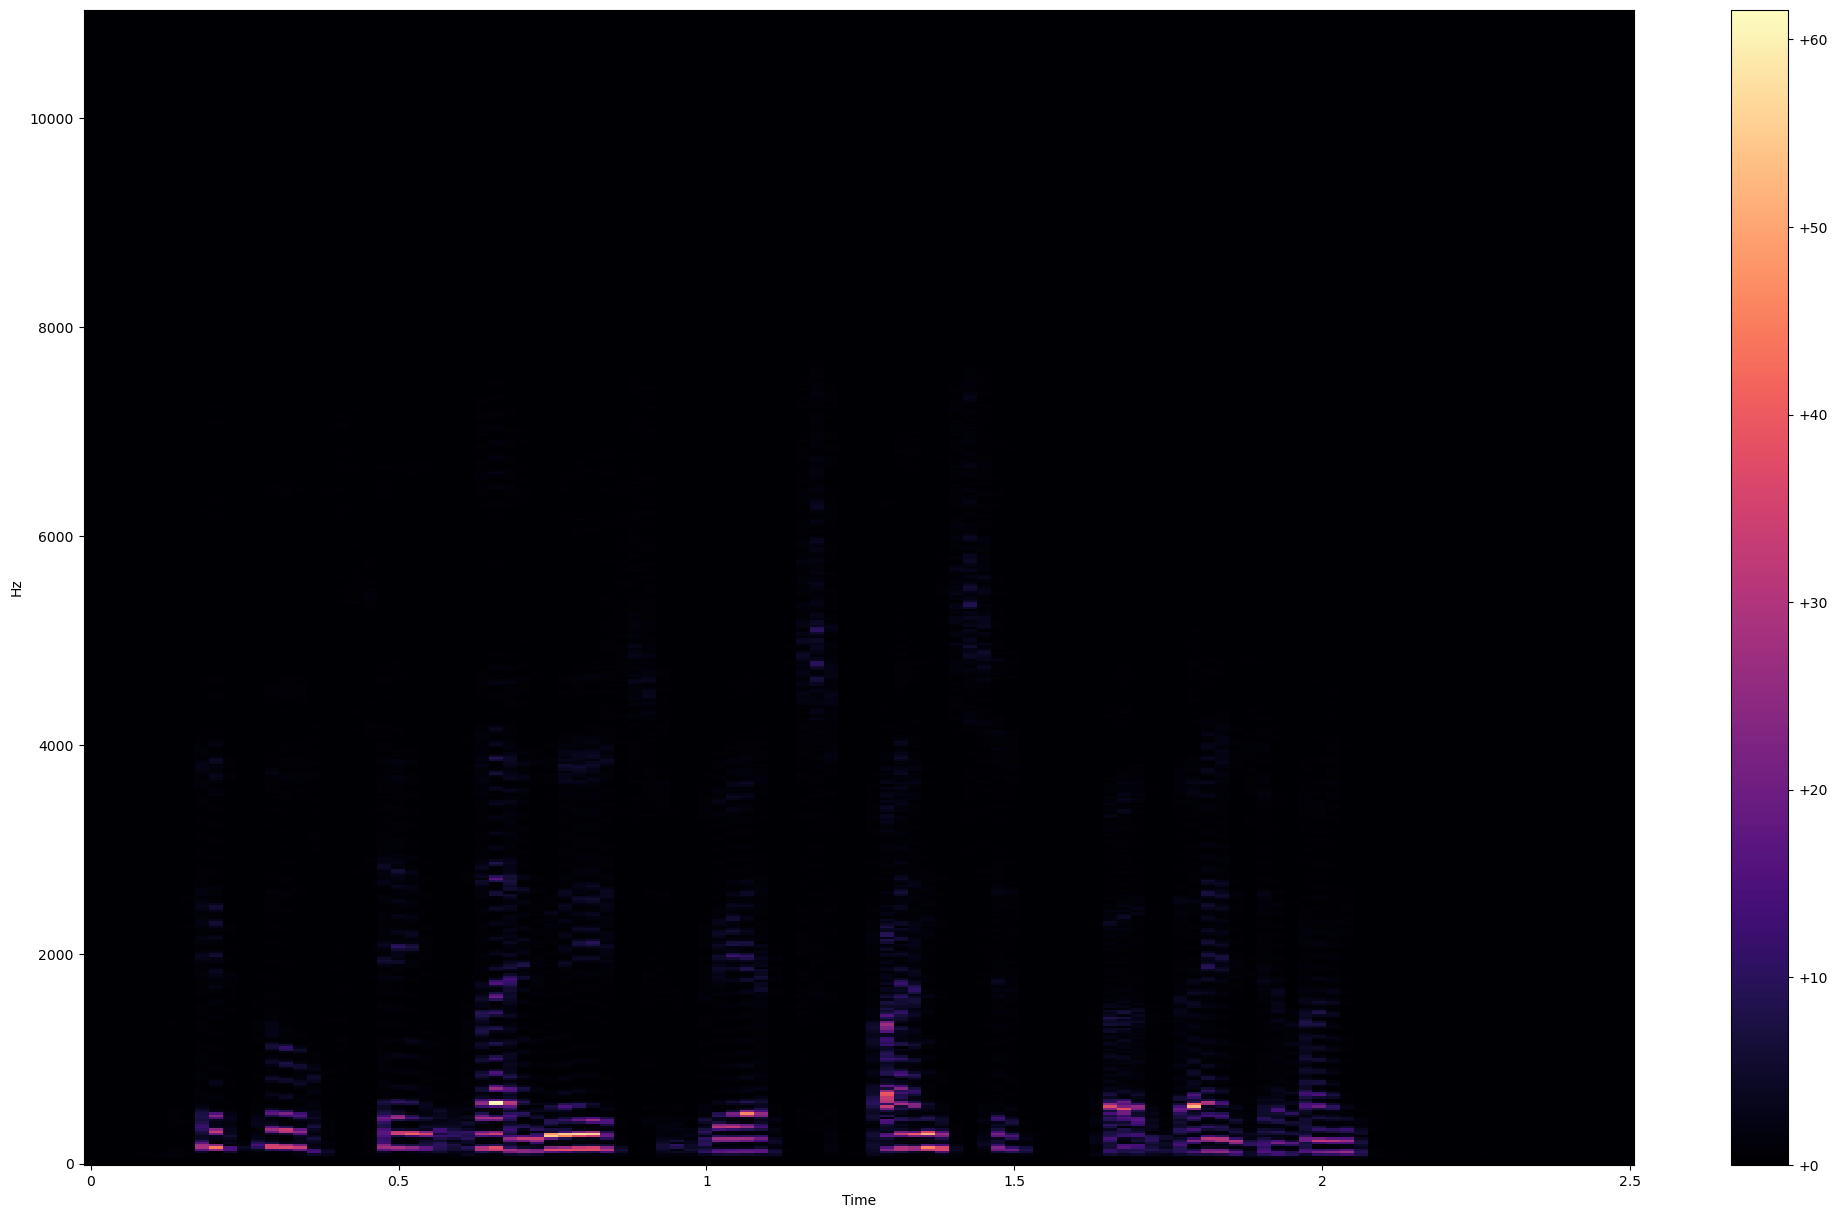

In [128]:
plot_spectrogram(trade_off, sr, HOP_SIZE)

/tmp/ipykernel_58526/3410608070.py:1: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  y_log_scale = librosa.power_to_db(trade_off)


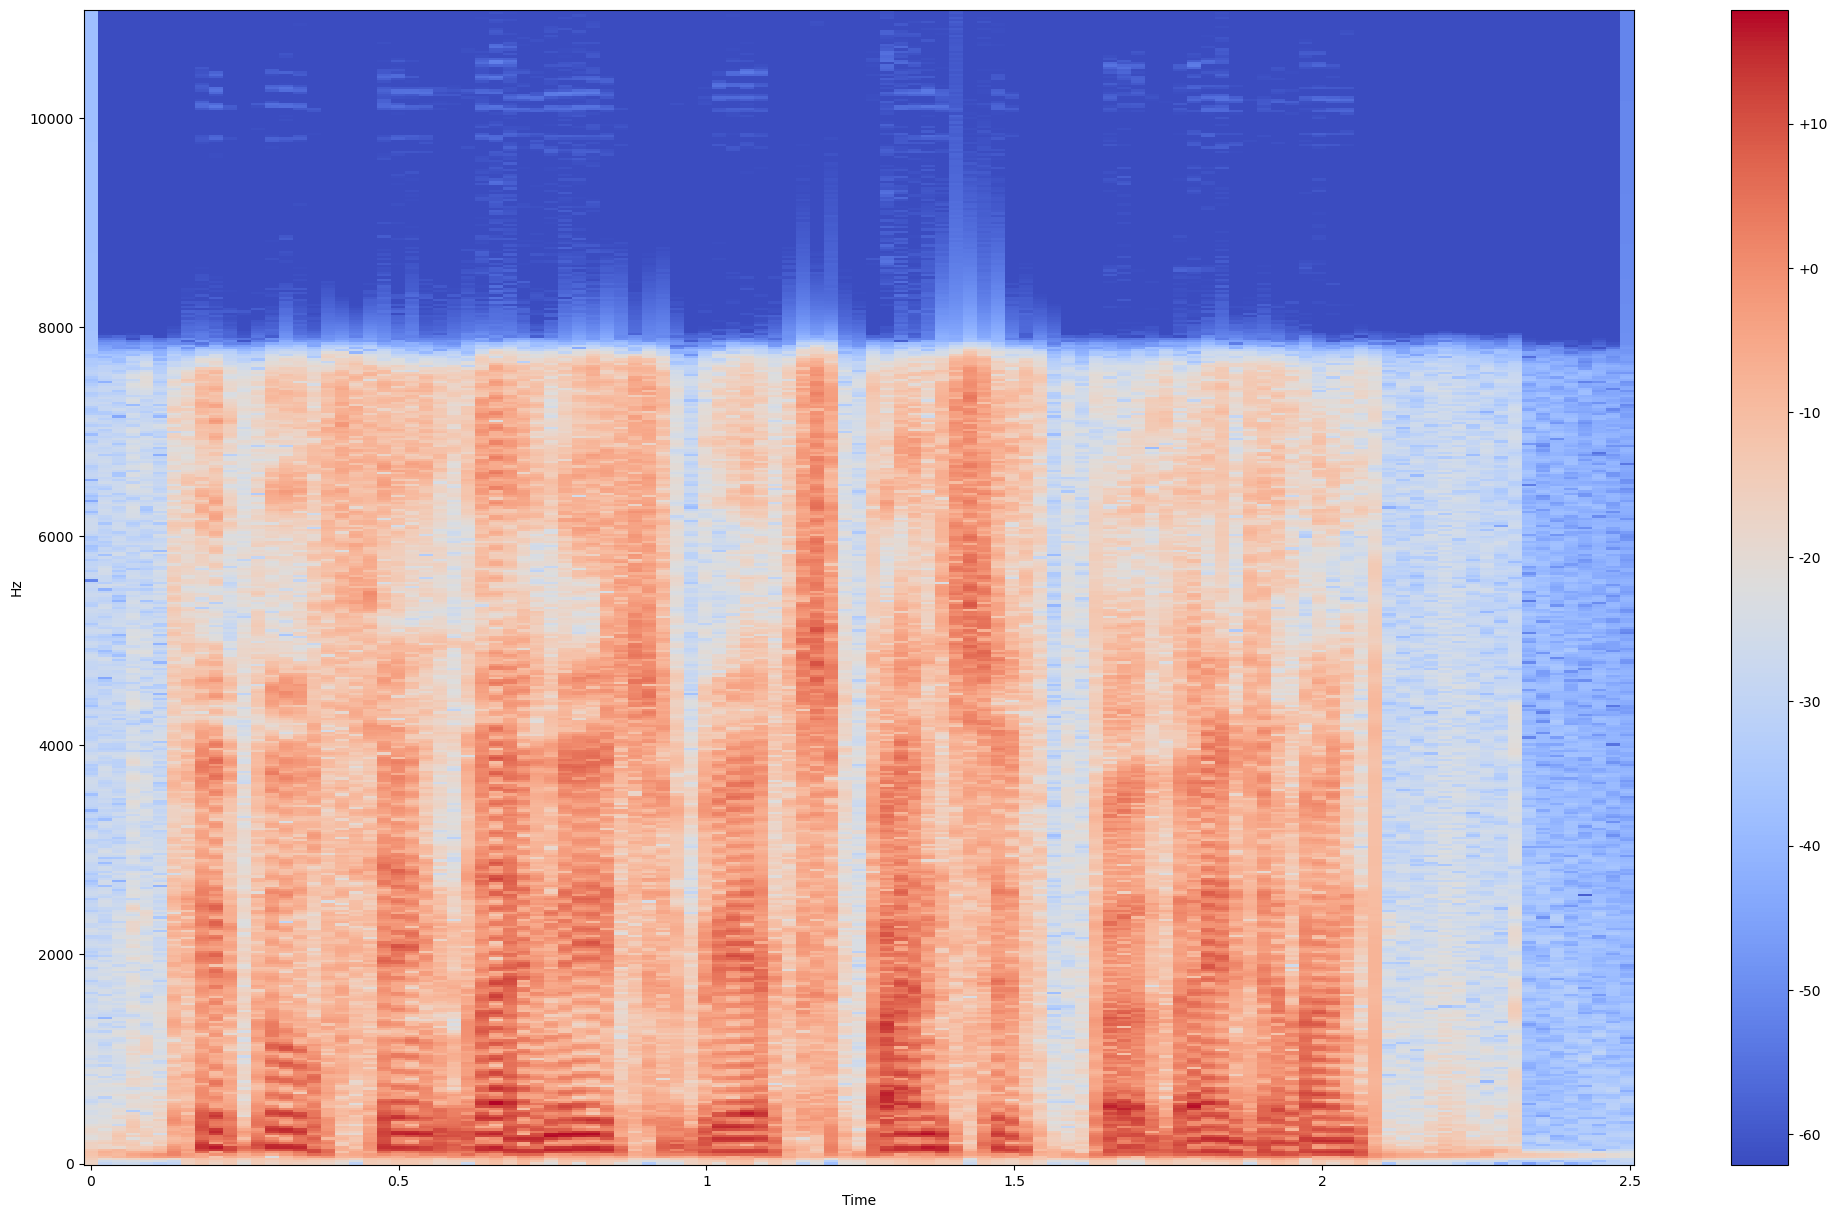

In [136]:
y_log_scale = librosa.power_to_db(trade_off)
plot_spectrogram(y_log_scale, sr, HOP_SIZE)


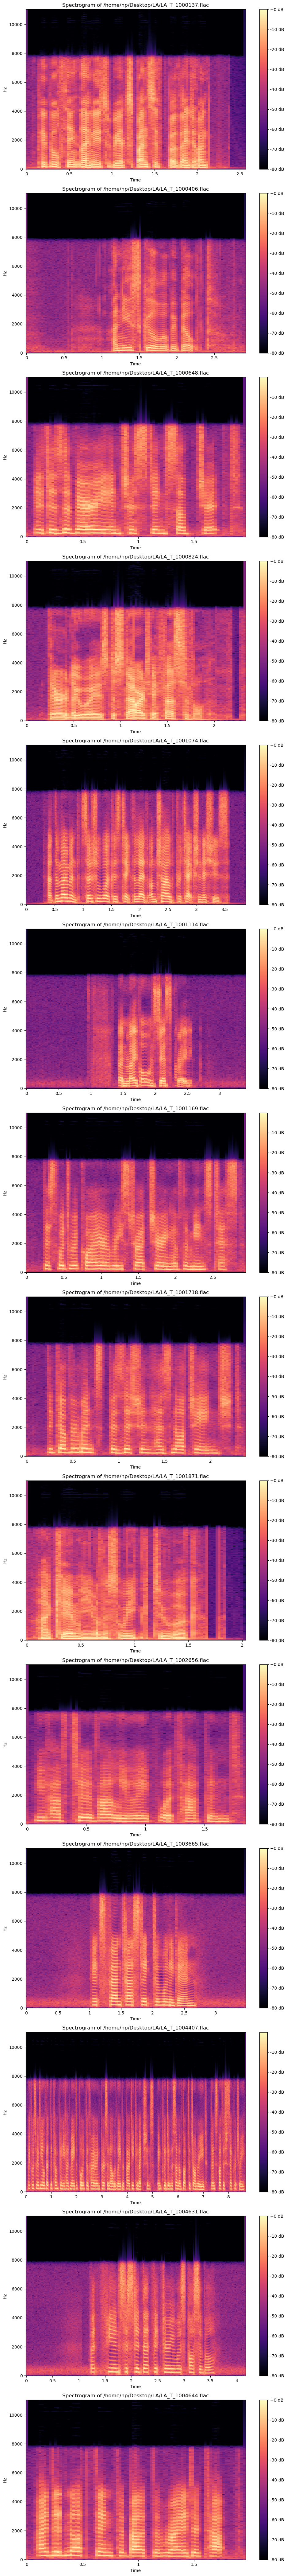

In [137]:
# Create subplots for each spectrogram
num_files = len(files)
fig, axs = plt.subplots(num_files, 1, figsize=(10, 6*num_files))

for i, audio_file in enumerate(files):
    y, sr = librosa.load(audio_file)

    D = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, window = window_type)

    D_db = librosa.power_to_db(abs(D), ref=np.max)

    # Plot spectrogram
    ax = axs[i] if num_files > 1 else axs
    img = librosa.display.specshow(D_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear', ax=ax)
    ax.set_title(f'Spectrogram of {audio_file}')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()